## Regularized Linear Models

- The prediction error can be decomposed into two components: bias and variance
- Regularized linear models aim to minimize prediction error 
- 기본적으로 아래 두개의 모형이 사용된다
- 두 모델이 해결하고자 하는 공통적인 문제 : overfitting
- **샘플의 갯수에 비해서 변수가 많을 때** 모형을 단순화하기 위해 필요함

독립변수의 갯수가 모형에 비해 많을 때 Regularized Linear models를 사용한다

### Ridge Regression

- Loss function = OLS loss function (Mean-squared error) + $\alpha \sum_{k} \beta_k^2$
    - MSE + $\alpha \sum_{k} \beta_k^2$를 구하는 것이 Ridge Regression 이라고 한다
    - MSE는 하나의 패널티 term이라고도 한다
    - 베타값이 커지면 로스값이 커진다 : 계수값이 너무 큰 값을 가지지 않게 조절해줌
    - L2 regularization
    - $\alpha$, a hyperparameter, needs to be chosen. 패널티의 강도를 곱해주는 것. 알파를 키우면 키울수록 패널티텀의 영향력이 커지니까 베타 추정에 사용됨
    - $\alpha = 0$ can lead to overfitting, while a very large value of $\alpha$ can lead to underfitting. 알파값이 0이면 과적합 문제가 발생할 수 있다
    - It draws all coefficient estimates closer to zero but does not impose exact zeros anywhere $\rightarrow$ it is a *shrinkage* method that helps prevent coefficients from becoming unduly large in magnitude.
    - 적절한 수준의 알파값을 구해야 한다
    
- Regularization applies only to the training set.
- Regularization does not apply to the intercept term. 상수항은 포함되지 않는다
- Ridge regression is very sensitive to feature scales $\rightarrow$ very important to scale 변수의 값에 크기에 굉장히 많은 영향을 받는다 : 변수를 표준화 해야한다
- 학습을 하기 전에 모형을 표준화 하는것이 좋다

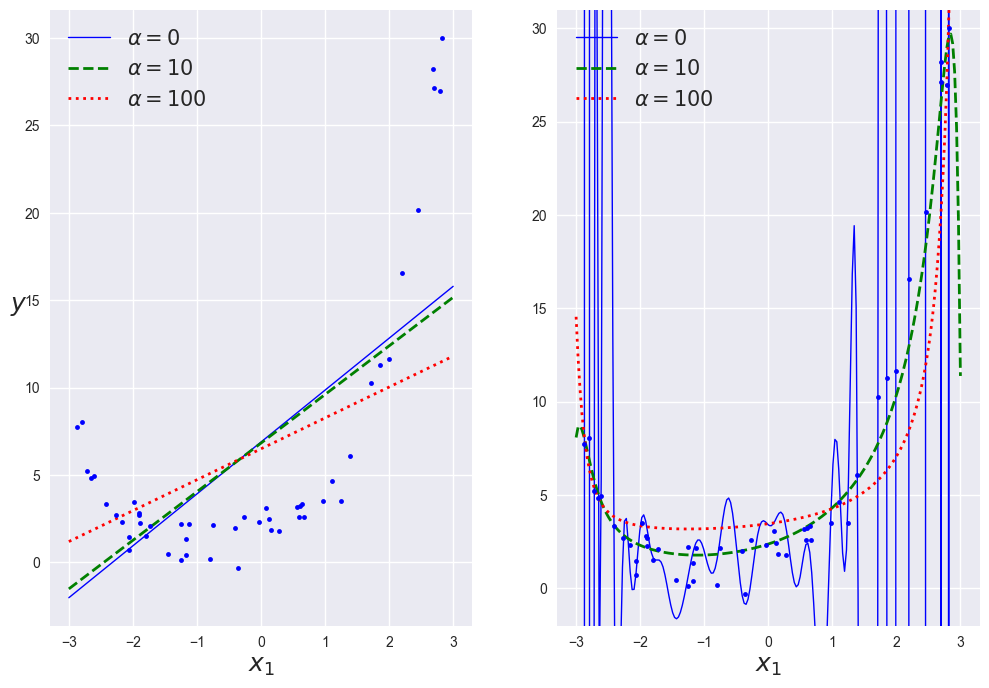

In [8]:
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)
m = 50
X = 6 * np.random.rand(m, 1) - 3
y =  0.2 * X**4 + 0.4 * X**3 + 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X_new = np.linspace(-3, 3, 200).reshape(200, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=40, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
   # plt.axis([0, 3, 0, 4])

plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10, 100), random_state=42)
plt.ylim((-2,31))
plt.show()

#알파가 커지면 커질수록 기울기의 차이가 작아진다. 즉, 패널티를 높일수록 모형이 더 좋아졌다

- left figure: ridge model with varing $\alpha$
- right figure: PolynomialFeatures (degree = 10), StandardScaler, ridge model with varying $\alpha$
- the larger $\alpha$, the flatter
- One can use either normal equations or GD for ridge regression.

In [2]:
# based on normal equations
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[11.30027687]])

---

from sklearn.linear_model import Ridge, Lasso

---

sklearn 패키지 -> 다양한 모듈 존재

- ridge_reg = Ridge()
- ridge_ret.fit(X,y) $\leftarrow$ 모델 훈련
- ridge_reg.coeff()
- ridge_reg.predict() 예측치 도출해주는 메소드

100%|██████████| 1000/1000 [00:00<00:00, 4795.04it/s]


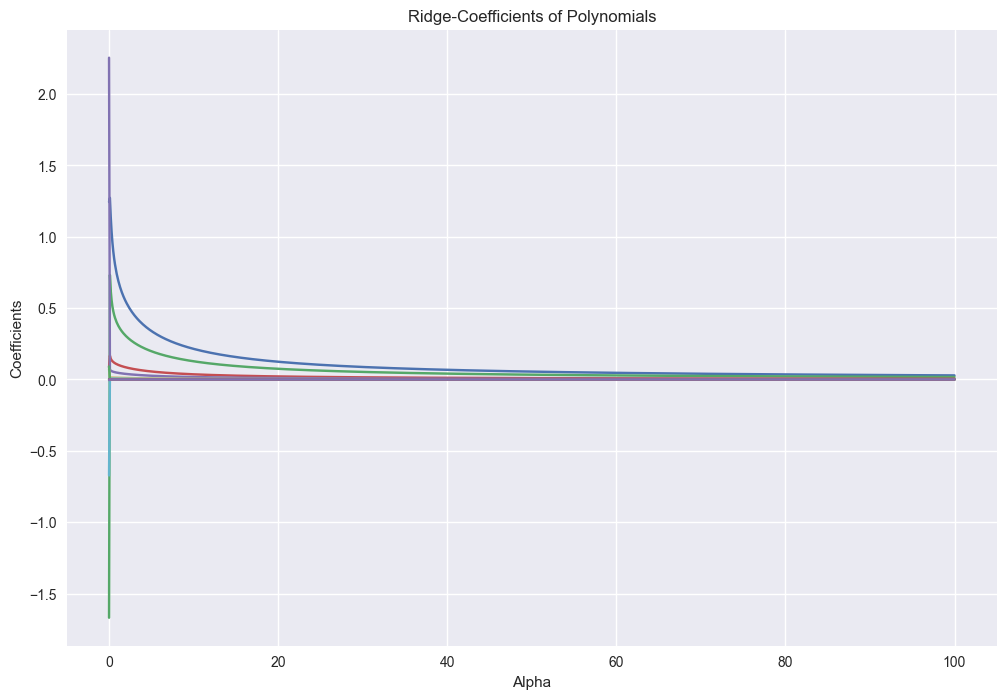

In [3]:
from tqdm import tqdm

poly = PolynomialFeatures(degree=10, include_bias=False)
X1 = poly.fit_transform(X)
alphas = np.linspace(0,100,1000)
coefs = []

for alpha in tqdm(alphas):
    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(X1, y)
    coefs.append(ridge.coef_)

    
plt.figure(figsize=(12,8))
for i in range(10):
    plt.plot(alphas,np.array([coefs[x][0][i] for x in range(len(coefs))]))
plt.title('Ridge-Coefficients of Polynomials')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.show()

Overfitting 방지가 목표이다

### LASSO

- Loss function = OLS loss function + $\alpha \sum_{k} | \beta_k |$
    - 절댓값으로 구하는 것이 Lasso이다
    - Ridge와 가장 큰 차이점은 절댓값과 제곱이란 형태의 차이이다
    - LASSO에서는 덜 중요한 변수들은 전부다 버리는 것이다 (Ridge는 버리지는 않는데 극한으로 크기를 제한함)
    - 알파의 크기를 키울수록 좋은 모형이 나온다
    - L1 regularization
    - It can be used for feature selection:
        - shrinks the coefficients of less important features to zero $\rightarrow$ can be used to select important features of the data $\rightarrow$ can be thought of as a variable *selection* method

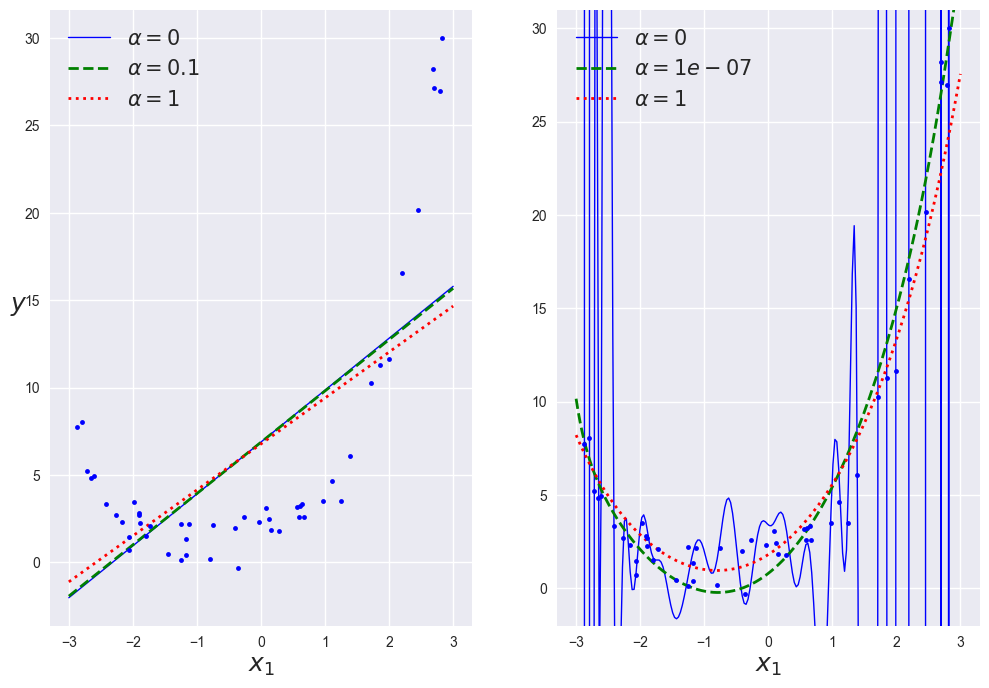

In [4]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(12,8))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.ylim((-2,31))
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]<ipython-input-5-87b8dfa28f41>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X1, y)
/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
100%|██████████| 1000/1000 [00:00<00:00, 4204.02it/s]


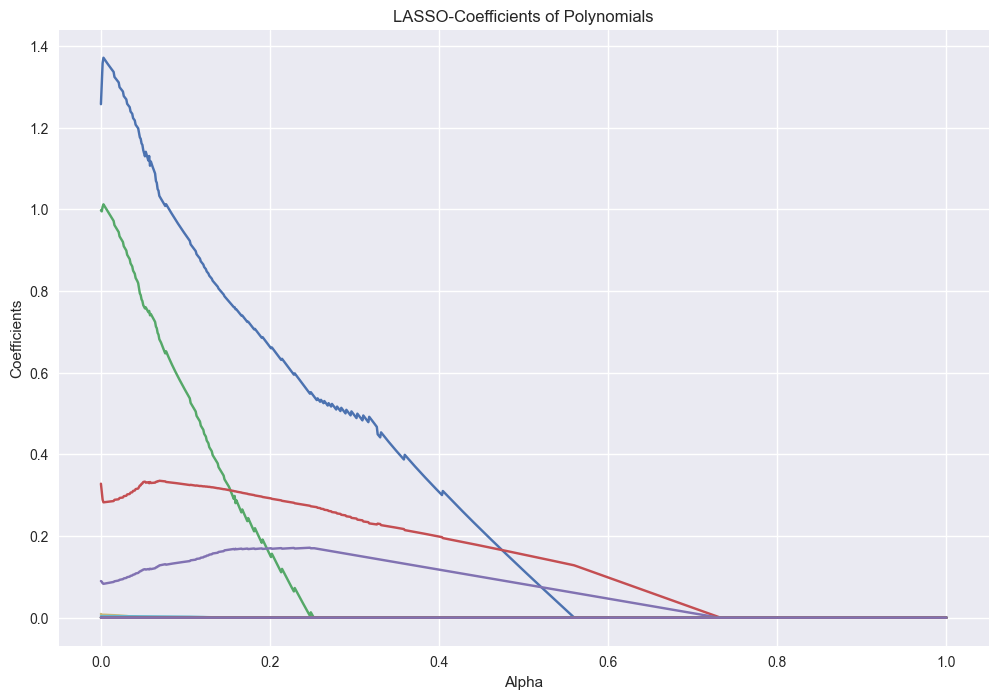

In [5]:
poly = PolynomialFeatures(degree=10, include_bias=False)
X1 = poly.fit_transform(X)
alphas = np.linspace(0,1,1000)
coefs = []

for alpha in tqdm(alphas):
    lasso = Lasso(alpha=alpha, tol=0.01, normalize=True)
    lasso.fit(X1, y)
    coefs.append(lasso.coef_)

    
plt.figure(figsize=(12,8))
for i in range(10):
    plt.plot(alphas, np.array([coefs[x][i] for x in range(len(coefs))]))
plt.title('LASSO-Coefficients of Polynomials')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.show()

마지막에는 모든 coefficient가 0으로 수렴한다. 과적합을 방지하려다가 오히려 모든 변수들의 계수가 모두 0으로 가는 모형 설정 문제가 발생할 수도 있다

In [6]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([11.27485542])

<img src="./img/ridge_lasso.png" width="600" height="600">

- 마름모꼴 : error를 상수항으로 정한 경우

**above image : error function을 시각화한 것**
$$c = \Sigma\beta_k^2$$
$$\beta_1^2 + \beta_2^2 = (\sqrt{c})^2$$
- 원의 형식으로 표현한 이유 : 위 식을 해석하면 원의 방정식이 도출됨
- $\hat\beta$ : $\beta_1,\beta_2$의 추정치
$\hat\beta$를 고를 경우 과적합의 문제가 발생한다는 것
- 왼쪽으로부터 feature selection method, shrinkage method라고 부른다
- L1 패널티 : Lasso, L2 패널티 : Ridge

## Early Stopping
- another way of regularizing the iterative algorithm such as GD is to stop when one arrives at the mimium of loss function. 
- https://en.wikipedia.org/wiki/Early_stopping
- 학습이 어느정도 되었을 때 학습을 멈추면 좋은 모델을 구할 수 있을 것이라는 아이디어에서 가져온 개념이다

from sklearn.model_selection import train_test_split, Kfold

X_train, X_val, y_train, y_val = train_test_split(X , y, test_size = 0.3, random_state=42)


---

- 데이터 순서에 신경쓰지 않고 무작위로 뽑음
- test size : 전체 데이터 사이즈에서 30%는 성능을 평가하는 test set으로 설정한다는 뜻. 70%는 모형 형성에 기여하는 데이터 셋임
- random_state : 테스트를 재현하기 위해 넣는 인자. random seed와 같은 의미

---

from sklearn.metrics import mean_squared_error

ridge_reg.fit

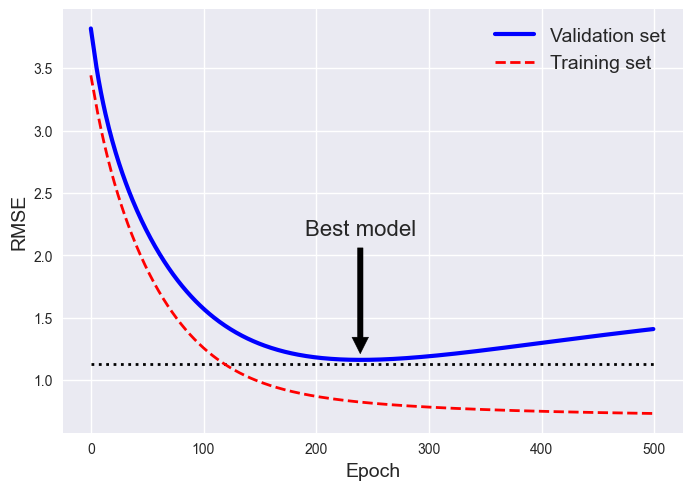

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

- Best model 이후 : 과적합 문제 발생
    - 모형의 과적합 전에 학습을 일찍 끝냄으로써 과적합을 방지한다는 것